In [16]:
# package install
!pip install pandas numpy scikit-learn matplotlib seaborn

## Iris Link pipeline
- Link Component Color Annotations
  - <font color='yellow'>Yellow</font> : data load / preprocessing
  - <font color='green'>Green</font> : EDA
  - <font color='violet'>Violet</font> : model train / predict

### 0. Global Parameters
- global paprameter of link pipeline
  - test_size : rate of valid-set when train-valid-split
  - random_state : random_state 

### 1. Load package,data

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [48]:
iris = load_iris()

In [49]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


The `df` of green components and the `df` of purple components can be used independently of each other from the point of branching

* Modeling -> `target` of `df` : **0,1,2**
* EDA -> `target` of `df` : **setosa, versicolor, virginica**

### 2. EDA

In [50]:
df["target"] = df["target"].map({0: "setosa", 1: "versicolor", 2: "virginica"})
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


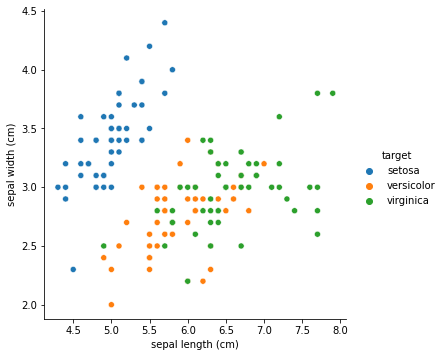

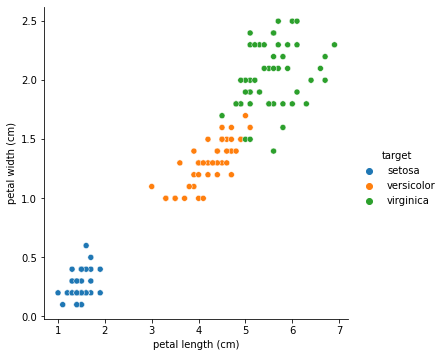

In [11]:
sns.pairplot(df, x_vars=["sepal length (cm)"], y_vars=["sepal width (cm)"], hue="target", height=5)
sns.pairplot(df, x_vars=["petal length (cm)"], y_vars=["petal width (cm)"], hue="target", height=5)
plt.show()

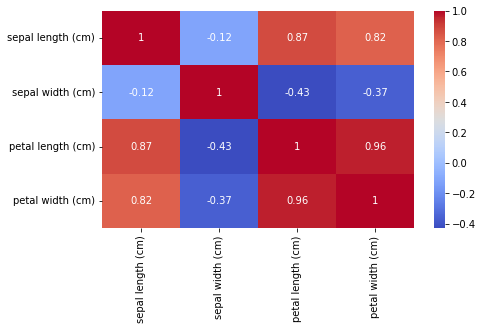

In [3]:
plt.figure(figsize=(7, 4))
sns.heatmap(
    df.corr(), annot=True, cmap="coolwarm"
)  # draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

### 3. Modeling

In [54]:
df_X = df.drop("target", axis=1)
df_y = df["target"]
train_X, valid_X, train_y, valid_y = train_test_split(
    df_X, df_y, test_size=test_size, random_state=random_state, stratify=df_y
)

In [111]:
model = LogisticRegression(random_state=random_state)
model.fit(train_X, train_y)

In [1]:
pred = model.predict(valid_X)
print(f"Accuracy : {accuracy_score(valid_y, pred)}")

Accuracy : 0.9333333333333333
